# Diamonds - 

In [184]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
import h2o
import os
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [119]:
diamonds = pd.read_csv('input/diamonds_train.csv')
diamonds_dumies = pd.read_csv('input/diamonds_train.csv')

In [120]:
diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276
...,...,...,...,...,...,...,...,...,...,...,...
40340,40340,0.50,Ideal,E,VS1,61.9,56.0,5.09,5.12,3.16,1716
40341,40341,0.33,Ideal,D,VS2,61.8,56.0,4.40,4.44,2.73,781
40342,40342,0.40,Premium,G,VVS1,61.5,58.0,4.69,4.74,2.90,1123
40343,40343,1.06,Ideal,I,VS1,61.2,57.0,6.59,6.56,4.03,5651


In [121]:
y = diamonds.price
X = diamonds.iloc[:,:-1]

In [122]:
X.set_index('id',inplace=True)

In [123]:
y

0        3446
1         732
2         475
3        9552
4        1276
         ... 
40340    1716
40341     781
40342    1123
40343    5651
40344    3959
Name: price, Length: 40345, dtype: int64

In [124]:
X.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [125]:
X.describe()

,carat,depth,table,x,y,z
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958
std,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


In [126]:
X.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.023118,0.181725,0.976267,0.945757,0.968685
depth,0.023118,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,0.092482,0.154399,0.985385,0.960350,1.000000


In [127]:
X.color.value_counts()

G    8462
E    7292
F    7133
H    6200
D    5094
I    4094
J    2070
Name: color, dtype: int64

In [128]:
color = {'D': 1,'E': 2,'F':3, 'G':4, 'H':5, 'I': 6, 'J':7}
X.color = [color[item] for item in X.color]

In [129]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,Premium,3,VS1,61.5,58.0,5.93,5.98,3.66
1,0.31,Ideal,1,SI1,60.8,56.0,4.37,4.32,2.64
2,0.30,Ideal,3,SI1,62.3,54.0,4.30,4.34,2.69
3,1.04,Ideal,2,VVS2,62.0,58.0,6.54,6.46,4.03
4,0.65,Ideal,7,SI1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,Ideal,2,VS1,61.9,56.0,5.09,5.12,3.16
40341,0.33,Ideal,1,VS2,61.8,56.0,4.40,4.44,2.73
40342,0.40,Premium,4,VVS1,61.5,58.0,4.69,4.74,2.90


In [130]:
X.clarity.value_counts()

SI1     9710
VS2     9164
SI2     6884
VS1     6092
VVS2    3839
VVS1    2738
IF      1357
I1       561
Name: clarity, dtype: int64

In [131]:
clarity = {'SI1': 1, 'VS2': 2,'SI2': 3,'VS1':4, 'VVS2':5, 'VVS1':6, 'IF': 7, 'I1':8}
X.clarity = [clarity[item] for item in X.clarity]

In [132]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,Premium,3,4,61.5,58.0,5.93,5.98,3.66
1,0.31,Ideal,1,1,60.8,56.0,4.37,4.32,2.64
2,0.30,Ideal,3,1,62.3,54.0,4.30,4.34,2.69
3,1.04,Ideal,2,5,62.0,58.0,6.54,6.46,4.03
4,0.65,Ideal,7,1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,Ideal,2,4,61.9,56.0,5.09,5.12,3.16
40341,0.33,Ideal,1,2,61.8,56.0,4.40,4.44,2.73
40342,0.40,Premium,4,6,61.5,58.0,4.69,4.74,2.90


In [133]:
X.cut.value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

In [134]:
cut = {'Ideal': 1, 'Premium': 2,'Very Good': 3,'Good':4, 'Fair':5}
X.cut = [cut[item] for item in X.cut]

In [135]:
X

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.78,2,3,4,61.5,58.0,5.93,5.98,3.66
1,0.31,1,1,1,60.8,56.0,4.37,4.32,2.64
2,0.30,1,3,1,62.3,54.0,4.30,4.34,2.69
3,1.04,1,2,5,62.0,58.0,6.54,6.46,4.03
4,0.65,1,7,1,61.4,55.0,5.58,5.62,3.44
...,...,...,...,...,...,...,...,...,...
40340,0.50,1,2,4,61.9,56.0,5.09,5.12,3.16
40341,0.33,1,1,2,61.8,56.0,4.40,4.44,2.73
40342,0.40,2,4,6,61.5,58.0,4.69,4.74,2.90


In [56]:
X.corr()

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,0.132754,0.291382,-0.155052,0.023118,0.181725,0.976267,0.945757,0.968685
cut,0.132754,1.000000,0.018865,-0.093632,0.213022,0.432025,0.124552,0.119245,0.149094
color,0.291382,0.018865,1.000000,0.042550,0.044171,0.026576,0.270998,0.262095,0.273173
clarity,-0.155052,-0.093632,0.042550,1.000000,-0.028916,-0.089991,-0.182480,-0.174818,-0.183647
depth,0.023118,0.213022,0.044171,-0.028916,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,0.432025,0.026576,-0.089991,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,0.124552,0.270998,-0.182480,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,0.119245,0.262095,-0.174818,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,0.149094,0.273173,-0.183647,0.092482,0.154399,0.985385,0.960350,1.000000


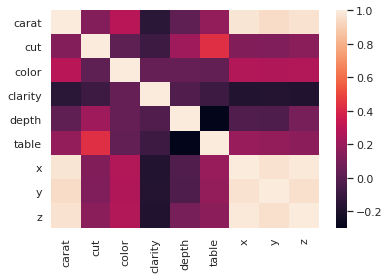

In [57]:
ax = sns.heatmap(X.corr())

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
#     Normalizer(),
]

tr = make_pipeline(*pipeline)

X_norm = tr.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = X.columns)

In [172]:
X_norm

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.037316,-0.084332,-0.348974,0.535023,-0.174910,0.246448,0.177558,0.212929,0.175592
1,-1.028243,-0.980870,-1.524998,-1.137752,-0.665206,-0.648784,-1.213123,-1.228642,-1.291969
2,-1.049327,-0.980870,-0.348974,-1.137752,0.385428,-1.544015,-1.275525,-1.211273,-1.220030
3,0.510857,-0.980870,-0.936986,1.092614,0.175301,0.246448,0.721350,0.629768,0.707943
4,-0.311402,-0.980870,2.003073,-1.137752,-0.244952,-1.096399,-0.134454,-0.099701,-0.140941
...,...,...,...,...,...,...,...,...,...
40340,-0.627656,-0.980870,-0.936986,0.535023,0.105259,-0.648784,-0.571270,-0.533909,-0.543801
40341,-0.986076,-0.980870,-1.524998,-0.580161,0.035216,-0.648784,-1.186379,-1.124432,-1.162479
40342,-0.838491,-0.084332,0.239038,1.650206,-0.174910,0.246448,-0.927855,-0.863907,-0.917885
40343,0.553024,-0.980870,1.415062,0.535023,-0.385037,-0.201168,0.765923,0.716610,0.707943


In [ ]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm[columns], y, test_size=0.01, random_state=42)

# Random Forest

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [64]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [65]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=80, min_samples_leaf=3)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_norm[columns], y, test_size=0.01, random_state=42)

In [68]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.9908151934570772
0.9815171339226366


In [70]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, rf_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('R2', r2_score(y_test, rf_reg.predict(X_test)))

METRIC SUMMARY
MSE 308778.1822857575
RMSE 555.6781283132867
MSLE 0.011896102363422839
MAE 299.7467956585519
R2 0.9815171339226366


# Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

In [73]:
gb_reg = GradientBoostingRegressor(n_estimators= 500, max_depth= 30, min_samples_split= 2, learning_rate= 0.01, loss='ls')

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=30, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
print(gb_reg.score(X_train, y_train))
print(gb_reg.score(X_test, y_test))

0.999134177178367
0.9715177075413237


In [75]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, gb_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, gb_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, gb_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, gb_reg.predict(X_test)))
print('R2', r2_score(y_test, gb_reg.predict(X_test)))

METRIC SUMMARY
MSE 475830.4505323747
RMSE 689.8046466445227
MSLE 0.01788139792741579
MAE 357.7452484239217
R2 0.9715177075413238


# H20

In [76]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

In [77]:
h2o.init(ip="127.0.0.1", port="8080")

Checking whether there is an H2O instance running at http://127.0.0.1:8080 . connected.


H2O cluster uptime:,3 mins 18 secs
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_root_tkaxkd
H2O cluster total nodes:,1
H2O cluster free memory:,7.811 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [104]:
training_columns = ['carat', 'depth', 'table','cut']

In [105]:
response_column = 'price'

In [106]:
data = h2o.H2OFrame(diamonds_dumies)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [107]:
model_auto_h2o = H2OAutoML(max_models=30, nfolds = 5, max_runtime_secs=600)

In [108]:
model_auto_h2o.train(y = y, training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [109]:
lb = model_auto_h2o.leaderboard

In [110]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200301_151444,298075,545.963,298075,273.286,0.0947334
StackedEnsemble_BestOfFamily_AutoML_20200301_151444,298934,546.748,298934,272.517,0.0941733
XGBoost_1_AutoML_20200301_151444,300557,548.231,300557,276.218,0.09552
GBM_4_AutoML_20200301_151444,309555,556.377,309555,280.352,0.0965692
GBM_1_AutoML_20200301_151444,310399,557.134,310399,289.806,0.105885
GBM_3_AutoML_20200301_151444,311993,558.564,311993,286.468,0.10434
XGBoost_2_AutoML_20200301_151444,313993,560.351,313993,278.047,0.0936042
GBM_2_AutoML_20200301_151444,316403,562.497,316403,290.529,0.106485
DRF_1_AutoML_20200301_151444,317907,563.832,317907,282.032,0.0966801
XGBoost_3_AutoML_20200301_151444,321855,567.323,321855,299.969,0.113757


# Random Forest H2O

In [78]:
y = pd.DataFrame(y)

In [79]:
X_norm_price = X_norm.merge(y, left_index=True, right_index=True)

In [80]:
data = h2o.H2OFrame(X_norm_price)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [81]:
training_columns = ['carat', 'cut', 'color', 'clarity', 'depth']
response_column = 'price'

In [83]:
train, test = data.split_frame(ratios=[0.99])

In [84]:
model_forest_h2o = H2ORandomForestEstimator(ntrees=400, max_depth=30, nfolds=20)
model_forest_h2o.train(x=training_columns, y=response_column, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [85]:
performance = model_forest_h2o.model_performance(test_data=test)

In [86]:
print(performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2191087.024438967
RMSE: 1480.232084653946
MAE: 1024.3406395691707
RMSLE: 0.5424994422511914
Mean Residual Deviance: 2191087.024438967



# Auto Magic Learning H2O

In [87]:
data = h2o.H2OFrame(X_norm_price)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [95]:
X_norm_price

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.037316,-0.084332,-0.348974,0.535023,-0.174910,0.246448,0.177558,0.212929,0.175592,3446
1,-1.028243,-0.980870,-1.524998,-1.137752,-0.665206,-0.648784,-1.213123,-1.228642,-1.291969,732
2,-1.049327,-0.980870,-0.348974,-1.137752,0.385428,-1.544015,-1.275525,-1.211273,-1.220030,475
3,0.510857,-0.980870,-0.936986,1.092614,0.175301,0.246448,0.721350,0.629768,0.707943,9552
4,-0.311402,-0.980870,2.003073,-1.137752,-0.244952,-1.096399,-0.134454,-0.099701,-0.140941,1276
...,...,...,...,...,...,...,...,...,...,...
40340,-0.627656,-0.980870,-0.936986,0.535023,0.105259,-0.648784,-0.571270,-0.533909,-0.543801,1716
40341,-0.986076,-0.980870,-1.524998,-0.580161,0.035216,-0.648784,-1.186379,-1.124432,-1.162479,781
40342,-0.838491,-0.084332,0.239038,1.650206,-0.174910,0.246448,-0.927855,-0.863907,-0.917885,1123
40343,0.553024,-0.980870,1.415062,0.535023,-0.385037,-0.201168,0.765923,0.716610,0.707943,5651


In [88]:
y = 'price'

In [90]:
    model_auto_h2o = H2OAutoML(max_models=30, nfolds = 5, max_runtime_secs=300)

In [91]:
# model_auto_h2o.train(y=response_column, training_frame=train)
model_auto_h2o.train(y = y, training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [92]:
model_auto_h2o

In [93]:
lb = model_auto_h2o.leaderboard

In [94]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200301_145440,285334,534.167,285334,265.546,0.0905687
StackedEnsemble_BestOfFamily_AutoML_20200301_145440,288585,537.201,288585,268.5,0.0925451
XGBoost_1_AutoML_20200301_145440,288610,537.224,288610,268.626,0.0926432
XGBoost_2_AutoML_20200301_145440,292952,541.25,292952,267.293,0.0890564
XGBoost_3_AutoML_20200301_145440,305796,552.989,305796,289.589,0.107966
GLM_1_AutoML_20200301_145440,1.59554e+07,3994.42,1.59554e+07,3033.61,1.12611


# KERAS

In [192]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_norm[columns], y, test_size=0.01, random_state=42)

In [194]:
# Define model
model_keras = Sequential()
model_keras.add(Dense(500, input_dim=5, activation= "relu"))
model_keras.add(Dense(100, activation= "relu"))
model_keras.add(Dense(50, activation= "relu"))
model_keras.add(Dense(1))
model_keras.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 500)               3000      
_________________________________________________________________
dense_44 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_45 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 51        
Total params: 58,201
Trainable params: 58,201
Non-trainable params: 0
_________________________________________________________________


In [195]:
model_keras.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_keras.fit(X_train, y_train, epochs=100)

Epoch 1/100
39941/39941 [==============================] - ETA: 3:20 - loss: 29881548.0000 - mean_squared_error: 29881548.00 - ETA: 10s - loss: 32075006.4583 - mean_squared_error: 32075008.0000 - ETA: 6s - loss: 32439952.1556 - mean_squared_error: 32439950.000 - ETA: 5s - loss: 31758563.7794 - mean_squared_error: 31758562.00 - ETA: 4s - loss: 30903012.6444 - mean_squared_error: 30903008.00 - ETA: 4s - loss: 29441250.7798 - mean_squared_error: 29441244.00 - ETA: 3s - loss: 26593742.4015 - mean_squared_error: 26593738.00 - ETA: 3s - loss: 22981861.5813 - mean_squared_error: 22981854.00 - ETA: 3s - loss: 20729510.1968 - mean_squared_error: 20729504.00 - ETA: 3s - loss: 18644955.1332 - mean_squared_error: 18644950.00 - ETA: 2s - loss: 17049855.5890 - mean_squared_error: 17049850.00 - ETA: 2s - loss: 15564191.2950 - mean_squared_error: 15564185.00 - ETA: 2s - loss: 14491558.0591 - mean_squared_error: 14491552.00 - ETA: 2s - loss: 13567472.8263 - mean_squared_error: 13567467.00 - ETA: 2s - l

39941/39941 [==============================] - ETA: 5s - loss: 2582288.7500 - mean_squared_error: 2582288.75 - ETA: 2s - loss: 1370218.4861 - mean_squared_error: 1370218.62 - ETA: 2s - loss: 1609626.4888 - mean_squared_error: 1609626.75 - ETA: 2s - loss: 1665465.1979 - mean_squared_error: 1665465.50 - ETA: 2s - loss: 1586989.8151 - mean_squared_error: 1586990.37 - ETA: 2s - loss: 1552020.6820 - mean_squared_error: 1552021.12 - ETA: 2s - loss: 1492567.5320 - mean_squared_error: 1492568.00 - ETA: 2s - loss: 1493312.3269 - mean_squared_error: 1493312.75 - ETA: 2s - loss: 1477612.6016 - mean_squared_error: 1477612.50 - ETA: 2s - loss: 1514787.1634 - mean_squared_error: 1514787.25 - ETA: 2s - loss: 1548594.3802 - mean_squared_error: 1548594.62 - ETA: 2s - loss: 1519584.1793 - mean_squared_error: 1519584.50 - ETA: 2s - loss: 1490443.6518 - mean_squared_error: 1490444.00 - ETA: 1s - loss: 1487676.2862 - mean_squared_error: 1487676.50 - ETA: 1s - loss: 1475057.2823 - mean_squared_error: 147505

39941/39941 [==============================] - ETA: 4s - loss: 383943.1250 - mean_squared_error: 383943.12 - ETA: 2s - loss: 910165.7243 - mean_squared_error: 910165.68 - ETA: 2s - loss: 855899.1700 - mean_squared_error: 855899.12 - ETA: 2s - loss: 912636.8226 - mean_squared_error: 912636.81 - ETA: 2s - loss: 919144.0417 - mean_squared_error: 919143.81 - ETA: 2s - loss: 915766.0301 - mean_squared_error: 915765.75 - ETA: 2s - loss: 903177.7695 - mean_squared_error: 903177.62 - ETA: 2s - loss: 929779.2213 - mean_squared_error: 929778.81 - ETA: 2s - loss: 925537.9179 - mean_squared_error: 925537.62 - ETA: 2s - loss: 928875.1610 - mean_squared_error: 928875.12 - ETA: 1s - loss: 941359.7071 - mean_squared_error: 941359.75 - ETA: 1s - loss: 949437.7389 - mean_squared_error: 949437.87 - ETA: 1s - loss: 942134.9473 - mean_squared_error: 942135.18 - ETA: 1s - loss: 926298.9912 - mean_squared_error: 926299.31 - ETA: 1s - loss: 926981.7676 - mean_squared_error: 926982.18 - ETA: 1s - loss: 929547.

39941/39941 [==============================] - ETA: 4s - loss: 131109.2188 - mean_squared_error: 131109.21 - ETA: 2s - loss: 586555.4591 - mean_squared_error: 586555.56 - ETA: 2s - loss: 630020.4525 - mean_squared_error: 630020.50 - ETA: 2s - loss: 601864.3454 - mean_squared_error: 601864.31 - ETA: 2s - loss: 563266.9509 - mean_squared_error: 563266.93 - ETA: 2s - loss: 569220.2272 - mean_squared_error: 569220.25 - ETA: 2s - loss: 563514.8940 - mean_squared_error: 563514.93 - ETA: 2s - loss: 558319.7450 - mean_squared_error: 558319.62 - ETA: 2s - loss: 536140.2255 - mean_squared_error: 536140.12 - ETA: 2s - loss: 563988.2676 - mean_squared_error: 563988.18 - ETA: 2s - loss: 553985.7325 - mean_squared_error: 553985.68 - ETA: 2s - loss: 559323.1300 - mean_squared_error: 559323.06 - ETA: 1s - loss: 546126.3611 - mean_squared_error: 546126.37 - ETA: 1s - loss: 537053.4015 - mean_squared_error: 537053.56 - ETA: 1s - loss: 541866.3442 - mean_squared_error: 541866.56 - ETA: 1s - loss: 541036.

39941/39941 [==============================] - ETA: 4s - loss: 64229.2891 - mean_squared_error: 64229.28 - ETA: 2s - loss: 350294.1866 - mean_squared_error: 350294.18 - ETA: 2s - loss: 344868.6716 - mean_squared_error: 344868.65 - ETA: 2s - loss: 363733.1339 - mean_squared_error: 363733.18 - ETA: 2s - loss: 372533.7211 - mean_squared_error: 372533.78 - ETA: 2s - loss: 385524.0999 - mean_squared_error: 385524.28 - ETA: 2s - loss: 393553.7799 - mean_squared_error: 393553.90 - ETA: 2s - loss: 405515.8407 - mean_squared_error: 405515.96 - ETA: 2s - loss: 405199.0273 - mean_squared_error: 405199.15 - ETA: 2s - loss: 403595.2551 - mean_squared_error: 403595.43 - ETA: 2s - loss: 421860.1396 - mean_squared_error: 421860.25 - ETA: 1s - loss: 417856.4853 - mean_squared_error: 417856.56 - ETA: 1s - loss: 419323.9058 - mean_squared_error: 419324.00 - ETA: 1s - loss: 418467.0338 - mean_squared_error: 418467.15 - ETA: 1s - loss: 412077.1844 - mean_squared_error: 412077.28 - ETA: 1s - loss: 408021.34

39941/39941 [==============================] - ETA: 5s - loss: 146079.5156 - mean_squared_error: 146079.51 - ETA: 2s - loss: 484888.4925 - mean_squared_error: 484888.53 - ETA: 2s - loss: 434617.5989 - mean_squared_error: 434617.53 - ETA: 2s - loss: 397876.8075 - mean_squared_error: 397876.75 - ETA: 2s - loss: 409304.8168 - mean_squared_error: 409304.78 - ETA: 2s - loss: 392368.3707 - mean_squared_error: 392368.34 - ETA: 2s - loss: 407428.5624 - mean_squared_error: 407428.50 - ETA: 2s - loss: 396736.4437 - mean_squared_error: 396736.37 - ETA: 1s - loss: 392092.6283 - mean_squared_error: 392092.56 - ETA: 1s - loss: 389761.3540 - mean_squared_error: 389761.31 - ETA: 1s - loss: 391012.8167 - mean_squared_error: 391012.78 - ETA: 1s - loss: 395532.3966 - mean_squared_error: 395532.43 - ETA: 1s - loss: 394000.3856 - mean_squared_error: 394000.46 - ETA: 1s - loss: 390161.1944 - mean_squared_error: 390161.28 - ETA: 1s - loss: 389052.2960 - mean_squared_error: 389052.40 - ETA: 1s - loss: 388645.

39941/39941 [==============================] - ETA: 5s - loss: 401328.6562 - mean_squared_error: 401328.65 - ETA: 2s - loss: 373346.1599 - mean_squared_error: 373346.15 - ETA: 2s - loss: 329543.4030 - mean_squared_error: 329543.40 - ETA: 2s - loss: 327279.5139 - mean_squared_error: 327279.50 - ETA: 2s - loss: 357125.2733 - mean_squared_error: 357125.25 - ETA: 2s - loss: 360561.0155 - mean_squared_error: 360560.93 - ETA: 2s - loss: 369292.4086 - mean_squared_error: 369292.37 - ETA: 2s - loss: 374373.1779 - mean_squared_error: 374373.15 - ETA: 2s - loss: 385069.4536 - mean_squared_error: 385069.37 - ETA: 2s - loss: 395071.3222 - mean_squared_error: 395071.37 - ETA: 2s - loss: 389876.9646 - mean_squared_error: 389877.03 - ETA: 2s - loss: 378480.6316 - mean_squared_error: 378480.65 - ETA: 2s - loss: 371629.4941 - mean_squared_error: 371629.46 - ETA: 2s - loss: 367582.3729 - mean_squared_error: 367582.31 - ETA: 1s - loss: 372484.3166 - mean_squared_error: 372484.25 - ETA: 1s - loss: 373914.

39941/39941 [==============================] - ETA: 7s - loss: 341926.1562 - mean_squared_error: 341926.15 - ETA: 2s - loss: 299461.0019 - mean_squared_error: 299460.96 - ETA: 2s - loss: 318831.3159 - mean_squared_error: 318831.31 - ETA: 2s - loss: 340627.9774 - mean_squared_error: 340627.96 - ETA: 2s - loss: 360914.4086 - mean_squared_error: 360914.37 - ETA: 2s - loss: 371744.6749 - mean_squared_error: 371744.65 - ETA: 2s - loss: 364810.2132 - mean_squared_error: 364810.18 - ETA: 2s - loss: 359802.3938 - mean_squared_error: 359802.31 - ETA: 2s - loss: 355241.0595 - mean_squared_error: 355241.00 - ETA: 2s - loss: 359628.3017 - mean_squared_error: 359628.25 - ETA: 2s - loss: 352453.3565 - mean_squared_error: 352453.25 - ETA: 2s - loss: 351220.1170 - mean_squared_error: 351219.93 - ETA: 2s - loss: 350561.3901 - mean_squared_error: 350561.25 - ETA: 1s - loss: 348394.4251 - mean_squared_error: 348394.25 - ETA: 1s - loss: 354171.8443 - mean_squared_error: 354171.71 - ETA: 1s - loss: 360378.

39941/39941 [==============================] - ETA: 4s - loss: 307925.5000 - mean_squared_error: 307925.50 - ETA: 2s - loss: 338211.5986 - mean_squared_error: 338211.59 - ETA: 2s - loss: 313428.3758 - mean_squared_error: 313428.37 - ETA: 2s - loss: 317657.0379 - mean_squared_error: 317657.06 - ETA: 2s - loss: 324326.6468 - mean_squared_error: 324326.68 - ETA: 2s - loss: 316266.2234 - mean_squared_error: 316266.28 - ETA: 2s - loss: 340461.9689 - mean_squared_error: 340462.03 - ETA: 2s - loss: 339304.4544 - mean_squared_error: 339304.53 - ETA: 2s - loss: 339329.1836 - mean_squared_error: 339329.21 - ETA: 2s - loss: 335405.1481 - mean_squared_error: 335405.15 - ETA: 2s - loss: 326395.0472 - mean_squared_error: 326395.06 - ETA: 1s - loss: 323460.8864 - mean_squared_error: 323460.84 - ETA: 1s - loss: 322332.8622 - mean_squared_error: 322332.84 - ETA: 1s - loss: 321972.3197 - mean_squared_error: 321972.25 - ETA: 1s - loss: 330121.0436 - mean_squared_error: 330120.96 - ETA: 1s - loss: 333101.

39941/39941 [==============================] - ETA: 5s - loss: 399727.3125 - mean_squared_error: 399727.31 - ETA: 2s - loss: 297822.4832 - mean_squared_error: 297822.46 - ETA: 2s - loss: 365225.6977 - mean_squared_error: 365225.65 - ETA: 2s - loss: 376170.6154 - mean_squared_error: 376170.59 - ETA: 2s - loss: 383311.2400 - mean_squared_error: 383311.25 - ETA: 2s - loss: 376381.9997 - mean_squared_error: 376382.09 - ETA: 2s - loss: 357690.0749 - mean_squared_error: 357690.15 - ETA: 2s - loss: 348027.1158 - mean_squared_error: 348027.12 - ETA: 2s - loss: 361088.5528 - mean_squared_error: 361088.53 - ETA: 2s - loss: 368927.4313 - mean_squared_error: 368927.50 - ETA: 2s - loss: 369985.3105 - mean_squared_error: 369985.34 - ETA: 2s - loss: 366920.3303 - mean_squared_error: 366920.34 - ETA: 1s - loss: 357702.8141 - mean_squared_error: 357702.93 - ETA: 1s - loss: 362495.9419 - mean_squared_error: 362496.06 - ETA: 1s - loss: 363250.4420 - mean_squared_error: 363250.53 - ETA: 1s - loss: 365217.

39941/39941 [==============================] - ETA: 7s - loss: 352825.1250 - mean_squared_error: 352825.12 - ETA: 2s - loss: 350871.7486 - mean_squared_error: 350871.71 - ETA: 2s - loss: 349780.8444 - mean_squared_error: 349780.81 - ETA: 2s - loss: 383789.2707 - mean_squared_error: 383789.28 - ETA: 2s - loss: 365867.6728 - mean_squared_error: 365867.68 - ETA: 2s - loss: 377200.4701 - mean_squared_error: 377200.50 - ETA: 2s - loss: 386355.4136 - mean_squared_error: 386355.43 - ETA: 2s - loss: 377890.5863 - mean_squared_error: 377890.59 - ETA: 2s - loss: 378538.7701 - mean_squared_error: 378538.78 - ETA: 2s - loss: 375357.1659 - mean_squared_error: 375357.15 - ETA: 2s - loss: 371852.1919 - mean_squared_error: 371852.18 - ETA: 1s - loss: 367476.1342 - mean_squared_error: 367476.12 - ETA: 1s - loss: 365952.9832 - mean_squared_error: 365952.93 - ETA: 1s - loss: 361951.3801 - mean_squared_error: 361951.34 - ETA: 1s - loss: 361858.3720 - mean_squared_error: 361858.34 - ETA: 1s - loss: 358054.

39941/39941 [==============================] - ETA: 3s - loss: 527582.8750 - mean_squared_error: 527582.87 - ETA: 2s - loss: 337925.7943 - mean_squared_error: 337925.81 - ETA: 2s - loss: 305530.7998 - mean_squared_error: 305530.75 - ETA: 2s - loss: 342375.2758 - mean_squared_error: 342375.31 - ETA: 2s - loss: 363374.7506 - mean_squared_error: 363374.87 - ETA: 2s - loss: 353694.8104 - mean_squared_error: 353694.90 - ETA: 2s - loss: 363320.5448 - mean_squared_error: 363320.62 - ETA: 2s - loss: 356676.2302 - mean_squared_error: 356676.28 - ETA: 2s - loss: 357375.6240 - mean_squared_error: 357375.71 - ETA: 2s - loss: 355343.3987 - mean_squared_error: 355343.50 - ETA: 2s - loss: 353944.8560 - mean_squared_error: 353944.90 - ETA: 2s - loss: 354365.2444 - mean_squared_error: 354365.25 - ETA: 1s - loss: 357328.4375 - mean_squared_error: 357328.43 - ETA: 1s - loss: 353627.5067 - mean_squared_error: 353627.50 - ETA: 1s - loss: 359706.1344 - mean_squared_error: 359706.15 - ETA: 1s - loss: 359968.

39941/39941 [==============================] - ETA: 3s - loss: 259298.8438 - mean_squared_error: 259298.84 - ETA: 2s - loss: 394083.7419 - mean_squared_error: 394083.71 - ETA: 1s - loss: 374415.4337 - mean_squared_error: 374415.46 - ETA: 1s - loss: 353918.3181 - mean_squared_error: 353918.34 - ETA: 1s - loss: 363219.4554 - mean_squared_error: 363219.43 - ETA: 1s - loss: 347934.3222 - mean_squared_error: 347934.28 - ETA: 1s - loss: 337459.0863 - mean_squared_error: 337459.09 - ETA: 1s - loss: 342208.0911 - mean_squared_error: 342208.06 - ETA: 1s - loss: 328162.5546 - mean_squared_error: 328162.56 - ETA: 1s - loss: 322628.1228 - mean_squared_error: 322628.06 - ETA: 1s - loss: 319357.5209 - mean_squared_error: 319357.56 - ETA: 1s - loss: 320441.0877 - mean_squared_error: 320441.15 - ETA: 1s - loss: 314442.6398 - mean_squared_error: 314442.68 - ETA: 1s - loss: 313573.2455 - mean_squared_error: 313573.21 - ETA: 1s - loss: 312469.3381 - mean_squared_error: 312469.28 - ETA: 1s - loss: 315588.

39941/39941 [==============================] - ETA: 4s - loss: 165933.6875 - mean_squared_error: 165933.68 - ETA: 1s - loss: 326271.0440 - mean_squared_error: 326271.03 - ETA: 1s - loss: 333475.9702 - mean_squared_error: 333475.96 - ETA: 1s - loss: 319527.3784 - mean_squared_error: 319527.34 - ETA: 1s - loss: 333939.6182 - mean_squared_error: 333939.68 - ETA: 1s - loss: 342631.7234 - mean_squared_error: 342631.75 - ETA: 1s - loss: 347489.3662 - mean_squared_error: 347489.34 - ETA: 1s - loss: 344219.5280 - mean_squared_error: 344219.53 - ETA: 1s - loss: 337062.3514 - mean_squared_error: 337062.31 - ETA: 1s - loss: 338905.2039 - mean_squared_error: 338905.15 - ETA: 1s - loss: 333789.3829 - mean_squared_error: 333789.31 - ETA: 1s - loss: 334149.2190 - mean_squared_error: 334149.12 - ETA: 1s - loss: 336008.6935 - mean_squared_error: 336008.59 - ETA: 1s - loss: 334963.6668 - mean_squared_error: 334963.59 - ETA: 1s - loss: 334544.8527 - mean_squared_error: 334544.81 - ETA: 1s - loss: 338107.

39941/39941 [==============================] - ETA: 4s - loss: 392579.5000 - mean_squared_error: 392579.50 - ETA: 2s - loss: 282255.6837 - mean_squared_error: 282255.68 - ETA: 2s - loss: 285928.3374 - mean_squared_error: 285928.34 - ETA: 2s - loss: 289394.7112 - mean_squared_error: 289394.71 - ETA: 2s - loss: 299938.8114 - mean_squared_error: 299938.81 - ETA: 2s - loss: 315479.9325 - mean_squared_error: 315479.96 - ETA: 2s - loss: 321269.6365 - mean_squared_error: 321269.65 - ETA: 2s - loss: 333108.5990 - mean_squared_error: 333108.62 - ETA: 1s - loss: 343226.2000 - mean_squared_error: 343226.28 - ETA: 1s - loss: 337104.8272 - mean_squared_error: 337104.87 - ETA: 1s - loss: 335180.1028 - mean_squared_error: 335180.06 - ETA: 1s - loss: 328968.5215 - mean_squared_error: 328968.50 - ETA: 1s - loss: 329972.8248 - mean_squared_error: 329972.78 - ETA: 1s - loss: 332142.9043 - mean_squared_error: 332142.96 - ETA: 1s - loss: 327077.9076 - mean_squared_error: 327078.00 - ETA: 1s - loss: 333886.

39941/39941 [==============================] - ETA: 5s - loss: 98926.9141 - mean_squared_error: 98926.91 - ETA: 1s - loss: 289771.4439 - mean_squared_error: 289771.40 - ETA: 1s - loss: 299872.4806 - mean_squared_error: 299872.46 - ETA: 1s - loss: 280624.3708 - mean_squared_error: 280624.37 - ETA: 1s - loss: 315946.3290 - mean_squared_error: 315946.34 - ETA: 1s - loss: 320801.6277 - mean_squared_error: 320801.62 - ETA: 1s - loss: 314783.1036 - mean_squared_error: 314783.03 - ETA: 1s - loss: 323827.2253 - mean_squared_error: 323827.21 - ETA: 1s - loss: 317890.4426 - mean_squared_error: 317890.40 - ETA: 1s - loss: 327426.4045 - mean_squared_error: 327426.37 - ETA: 1s - loss: 326661.0932 - mean_squared_error: 326661.03 - ETA: 1s - loss: 325048.1464 - mean_squared_error: 325048.09 - ETA: 1s - loss: 328423.6157 - mean_squared_error: 328423.53 - ETA: 1s - loss: 328758.5804 - mean_squared_error: 328758.56 - ETA: 1s - loss: 332205.0488 - mean_squared_error: 332205.00 - ETA: 1s - loss: 329436.44

Epoch 63/100
39941/39941 [==============================] - ETA: 4s - loss: 704852.5625 - mean_squared_error: 704852.56 - ETA: 1s - loss: 332523.7466 - mean_squared_error: 332523.68 - ETA: 1s - loss: 324926.5114 - mean_squared_error: 324926.43 - ETA: 2s - loss: 305753.6506 - mean_squared_error: 305753.62 - ETA: 2s - loss: 319170.5752 - mean_squared_error: 319170.53 - ETA: 2s - loss: 319883.1719 - mean_squared_error: 319883.09 - ETA: 1s - loss: 329446.0949 - mean_squared_error: 329446.03 - ETA: 1s - loss: 334538.2798 - mean_squared_error: 334538.21 - ETA: 1s - loss: 338544.8475 - mean_squared_error: 338544.78 - ETA: 1s - loss: 337181.7975 - mean_squared_error: 337181.78 - ETA: 1s - loss: 335573.2461 - mean_squared_error: 335573.21 - ETA: 1s - loss: 343429.1257 - mean_squared_error: 343429.12 - ETA: 1s - loss: 341285.8549 - mean_squared_error: 341285.87 - ETA: 1s - loss: 345693.6676 - mean_squared_error: 345693.65 - ETA: 1s - loss: 339044.6947 - mean_squared_error: 339044.62 - ETA: 1s - 

39941/39941 [==============================] - ETA: 3s - loss: 755438.4375 - mean_squared_error: 755438.43 - ETA: 1s - loss: 289257.8177 - mean_squared_error: 289257.84 - ETA: 1s - loss: 314366.2797 - mean_squared_error: 314366.31 - ETA: 1s - loss: 301919.7643 - mean_squared_error: 301919.78 - ETA: 1s - loss: 294131.6461 - mean_squared_error: 294131.65 - ETA: 1s - loss: 296343.9741 - mean_squared_error: 296343.96 - ETA: 1s - loss: 301077.5682 - mean_squared_error: 301077.59 - ETA: 1s - loss: 312000.0548 - mean_squared_error: 312000.09 - ETA: 1s - loss: 326328.4368 - mean_squared_error: 326328.53 - ETA: 1s - loss: 325121.6470 - mean_squared_error: 325121.75 - ETA: 1s - loss: 328376.2037 - mean_squared_error: 328376.31 - ETA: 1s - loss: 333563.7447 - mean_squared_error: 333563.81 - ETA: 1s - loss: 329850.0771 - mean_squared_error: 329850.15 - ETA: 1s - loss: 327238.0373 - mean_squared_error: 327238.12 - ETA: 1s - loss: 326031.8354 - mean_squared_error: 326031.93 - ETA: 1s - loss: 328837.

39941/39941 [==============================] - ETA: 3s - loss: 88759.7188 - mean_squared_error: 88759.71 - ETA: 2s - loss: 258376.0439 - mean_squared_error: 258376.04 - ETA: 2s - loss: 292898.3599 - mean_squared_error: 292898.31 - ETA: 2s - loss: 331978.5453 - mean_squared_error: 331978.53 - ETA: 2s - loss: 323946.1797 - mean_squared_error: 323946.18 - ETA: 2s - loss: 336116.8066 - mean_squared_error: 336116.84 - ETA: 2s - loss: 331426.9903 - mean_squared_error: 331426.96 - ETA: 2s - loss: 321340.2307 - mean_squared_error: 321340.18 - ETA: 2s - loss: 332730.6144 - mean_squared_error: 332730.56 - ETA: 1s - loss: 330172.5606 - mean_squared_error: 330172.46 - ETA: 1s - loss: 330269.7213 - mean_squared_error: 330269.62 - ETA: 1s - loss: 330664.6009 - mean_squared_error: 330664.56 - ETA: 1s - loss: 333022.4833 - mean_squared_error: 333022.43 - ETA: 1s - loss: 333687.5487 - mean_squared_error: 333687.59 - ETA: 1s - loss: 335998.6910 - mean_squared_error: 335998.71 - ETA: 1s - loss: 335719.80

39941/39941 [==============================] - ETA: 9s - loss: 356189.5625 - mean_squared_error: 356189.56 - ETA: 2s - loss: 327513.3798 - mean_squared_error: 327513.37 - ETA: 2s - loss: 343452.5283 - mean_squared_error: 343452.50 - ETA: 2s - loss: 312693.8506 - mean_squared_error: 312693.87 - ETA: 2s - loss: 326038.4797 - mean_squared_error: 326038.46 - ETA: 2s - loss: 326454.3866 - mean_squared_error: 326454.40 - ETA: 2s - loss: 319187.2820 - mean_squared_error: 319187.31 - ETA: 2s - loss: 316779.3953 - mean_squared_error: 316779.40 - ETA: 2s - loss: 323668.8410 - mean_squared_error: 323668.84 - ETA: 2s - loss: 318191.9480 - mean_squared_error: 318191.90 - ETA: 2s - loss: 320576.0739 - mean_squared_error: 320575.96 - ETA: 2s - loss: 324283.6242 - mean_squared_error: 324283.53 - ETA: 2s - loss: 330614.5157 - mean_squared_error: 330614.43 - ETA: 1s - loss: 337968.9754 - mean_squared_error: 337968.93 - ETA: 1s - loss: 336236.8123 - mean_squared_error: 336236.81 - ETA: 1s - loss: 334612.

39941/39941 [==============================] - ETA: 5s - loss: 291155.1250 - mean_squared_error: 291155.12 - ETA: 2s - loss: 328908.4544 - mean_squared_error: 328908.46 - ETA: 2s - loss: 314492.6527 - mean_squared_error: 314492.68 - ETA: 2s - loss: 326807.8216 - mean_squared_error: 326807.78 - ETA: 2s - loss: 328708.8486 - mean_squared_error: 328708.78 - ETA: 2s - loss: 337052.9310 - mean_squared_error: 337052.90 - ETA: 2s - loss: 344884.6420 - mean_squared_error: 344884.65 - ETA: 2s - loss: 345728.3836 - mean_squared_error: 345728.34 - ETA: 2s - loss: 341197.2692 - mean_squared_error: 341197.25 - ETA: 2s - loss: 340353.8561 - mean_squared_error: 340353.81 - ETA: 2s - loss: 331272.9900 - mean_squared_error: 331272.93 - ETA: 2s - loss: 331497.5460 - mean_squared_error: 331497.40 - ETA: 2s - loss: 335733.7092 - mean_squared_error: 335733.53 - ETA: 1s - loss: 333251.5432 - mean_squared_error: 333251.43 - ETA: 1s - loss: 329334.5121 - mean_squared_error: 329334.40 - ETA: 1s - loss: 327160.

39941/39941 [==============================] - ETA: 4s - loss: 71773.5312 - mean_squared_error: 71773.53 - ETA: 2s - loss: 315898.0775 - mean_squared_error: 315898.06 - ETA: 2s - loss: 314845.0697 - mean_squared_error: 314845.03 - ETA: 2s - loss: 312245.2046 - mean_squared_error: 312245.25 - ETA: 2s - loss: 305501.7720 - mean_squared_error: 305501.81 - ETA: 2s - loss: 307426.7807 - mean_squared_error: 307426.84 - ETA: 2s - loss: 311548.9796 - mean_squared_error: 311549.09 - ETA: 2s - loss: 325834.1744 - mean_squared_error: 325834.34 - ETA: 2s - loss: 329873.8736 - mean_squared_error: 329874.03 - ETA: 2s - loss: 327245.3764 - mean_squared_error: 327245.53 - ETA: 2s - loss: 318887.4096 - mean_squared_error: 318887.56 - ETA: 1s - loss: 311990.5815 - mean_squared_error: 311990.71 - ETA: 1s - loss: 320933.2358 - mean_squared_error: 320933.31 - ETA: 1s - loss: 319389.0608 - mean_squared_error: 319389.09 - ETA: 1s - loss: 326075.7348 - mean_squared_error: 326075.84 - ETA: 1s - loss: 329415.22

39941/39941 [==============================] - ETA: 5s - loss: 240062.7031 - mean_squared_error: 240062.70 - ETA: 2s - loss: 249770.9366 - mean_squared_error: 249770.93 - ETA: 2s - loss: 292430.5380 - mean_squared_error: 292430.56 - ETA: 2s - loss: 287856.9615 - mean_squared_error: 287856.96 - ETA: 2s - loss: 300168.3322 - mean_squared_error: 300168.34 - ETA: 2s - loss: 312579.1248 - mean_squared_error: 312579.12 - ETA: 2s - loss: 312676.0253 - mean_squared_error: 312676.06 - ETA: 2s - loss: 318218.5447 - mean_squared_error: 318218.53 - ETA: 2s - loss: 311512.3202 - mean_squared_error: 311512.31 - ETA: 3s - loss: 308282.5037 - mean_squared_error: 308282.53 - ETA: 3s - loss: 309147.1499 - mean_squared_error: 309147.15 - ETA: 3s - loss: 316548.3624 - mean_squared_error: 316548.37 - ETA: 3s - loss: 316650.0603 - mean_squared_error: 316650.06 - ETA: 3s - loss: 315224.5508 - mean_squared_error: 315224.56 - ETA: 3s - loss: 317858.0118 - mean_squared_error: 317858.03 - ETA: 3s - loss: 320480.

39941/39941 [==============================] - ETA: 4s - loss: 390087.7188 - mean_squared_error: 390087.71 - ETA: 2s - loss: 342646.6522 - mean_squared_error: 342646.59 - ETA: 2s - loss: 329003.4722 - mean_squared_error: 329003.46 - ETA: 2s - loss: 333296.7455 - mean_squared_error: 333296.68 - ETA: 2s - loss: 330448.5680 - mean_squared_error: 330448.50 - ETA: 2s - loss: 345013.0293 - mean_squared_error: 345012.96 - ETA: 2s - loss: 341587.4734 - mean_squared_error: 341587.40 - ETA: 2s - loss: 338819.8635 - mean_squared_error: 338819.75 - ETA: 2s - loss: 340425.6106 - mean_squared_error: 340425.46 - ETA: 2s - loss: 339162.9000 - mean_squared_error: 339162.81 - ETA: 2s - loss: 336218.1346 - mean_squared_error: 336218.12 - ETA: 2s - loss: 333593.4967 - mean_squared_error: 333593.46 - ETA: 2s - loss: 330758.2992 - mean_squared_error: 330758.25 - ETA: 2s - loss: 330959.0407 - mean_squared_error: 330959.00 - ETA: 2s - loss: 327432.2947 - mean_squared_error: 327432.28 - ETA: 2s - loss: 325280.

39941/39941 [==============================] - ETA: 5s - loss: 665733.6250 - mean_squared_error: 665733.62 - ETA: 2s - loss: 284692.0156 - mean_squared_error: 284692.00 - ETA: 2s - loss: 271865.8861 - mean_squared_error: 271865.90 - ETA: 2s - loss: 295645.1916 - mean_squared_error: 295645.25 - ETA: 2s - loss: 296790.9506 - mean_squared_error: 296791.00 - ETA: 2s - loss: 297273.3453 - mean_squared_error: 297273.37 - ETA: 2s - loss: 301650.8423 - mean_squared_error: 301650.90 - ETA: 2s - loss: 303662.6192 - mean_squared_error: 303662.62 - ETA: 2s - loss: 301345.6565 - mean_squared_error: 301345.68 - ETA: 2s - loss: 309194.7555 - mean_squared_error: 309194.75 - ETA: 2s - loss: 307587.4496 - mean_squared_error: 307587.40 - ETA: 2s - loss: 301345.9413 - mean_squared_error: 301345.93 - ETA: 2s - loss: 297914.4526 - mean_squared_error: 297914.46 - ETA: 2s - loss: 301449.2326 - mean_squared_error: 301449.31 - ETA: 2s - loss: 304987.8869 - mean_squared_error: 304988.00 - ETA: 1s - loss: 308624.

In [196]:
pred_train= model_keras.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model_keras.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

556.912768198343
586.0857542498393


In [198]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, model_keras.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, model_keras.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, model_keras.predict(X_test)))
print('MAE', mean_absolute_error(y_test, model_keras.predict(X_test)))
print('R2', r2_score(y_test, model_keras.predict(X_test)))

METRIC SUMMARY
MSE 343496.51133460307
RMSE 586.0857542498393
MSLE 0.023088280772529862
MAE 321.013180761054
R2 0.9794389617490411


# Diamonds Test

In [199]:
diamonds_test = pd.read_csv('input/diamonds_test.csv')

In [200]:
diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...,...
13444,13444,0.30,Premium,E,VS2,60.0,58.0,4.37,4.40,2.63
13445,13445,0.55,Ideal,D,VVS2,60.8,56.0,5.31,5.34,3.24
13446,13446,0.23,Very Good,E,VVS1,61.3,58.0,3.94,3.96,2.42
13447,13447,0.30,Ideal,D,VS2,61.4,58.0,4.29,4.31,2.64


In [201]:
diamonds_test.set_index('id',inplace=True)

In [202]:
diamonds_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...
13444,0.30,Premium,E,VS2,60.0,58.0,4.37,4.40,2.63
13445,0.55,Ideal,D,VVS2,60.8,56.0,5.31,5.34,3.24
13446,0.23,Very Good,E,VVS1,61.3,58.0,3.94,3.96,2.42


In [203]:
color = {'D': 1,'E': 2,'F':3, 'G':4, 'H':5, 'I': 6, 'J':7}
diamonds_test.color = [color[item] for item in diamonds_test.color]

In [204]:
clarity = {'SI1': 1, 'VS2': 2,'SI2': 3,'VS1':4, 'VVS2':5, 'VVS1':6, 'IF': 7, 'I1':8}
diamonds_test.clarity = [clarity[item] for item in diamonds_test.clarity]

In [205]:
cut = {'Ideal': 1, 'Premium': 2,'Very Good': 3,'Good':4, 'Fair':5}
diamonds_test.cut = [cut[item] for item in diamonds_test.cut]

In [206]:
diamonds_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,1.10,2,5,3,62.2,58.0,6.69,6.60,4.13
1,0.51,1,6,1,62.5,57.0,5.07,5.10,3.18
2,2.03,2,4,1,61.9,59.0,8.14,8.09,5.02
3,1.21,2,3,1,60.0,60.0,6.96,6.91,4.16
4,0.55,1,3,1,61.8,55.0,5.27,5.22,3.24
...,...,...,...,...,...,...,...,...,...
13444,0.30,2,2,2,60.0,58.0,4.37,4.40,2.63
13445,0.55,1,1,5,60.8,56.0,5.31,5.34,3.24
13446,0.23,3,2,6,61.3,58.0,3.94,3.96,2.42


In [207]:
pipeline = [
    StandardScaler(),
#     Normalizer(),
]

tr = make_pipeline(*pipeline)

X_norm_test = tr.fit_transform(diamonds_test)
X_norm_test = pd.DataFrame(X_norm_test, columns = diamonds_test.columns)

In [208]:
X_norm_test

,carat,cut,color,clarity,depth,table,x,y,z
0,0.641654,-0.090572,0.825150,-0.004962,0.318043,0.231081,0.856946,0.780253,0.802251
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896,-0.216898,-0.592755,-0.571521,-0.491658
2,2.617757,-0.090572,0.237766,-1.126452,0.109191,0.679059,2.154518,2.123014,2.014439
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540,1.127037,1.098563,1.059619,0.843111
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574,-1.112854,-0.413779,-0.463379,-0.409938
...,...,...,...,...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540,0.231081,-1.219169,-1.202348,-1.240763
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601,-0.664876,-0.377984,-0.355237,-0.409938
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514,0.231081,-1.603966,-1.598868,-1.526785
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896,0.231081,-1.290759,-1.283454,-1.227143


In [209]:
X_norm_test = X_norm_test.iloc[:,:-4]

In [210]:
X_norm_test

,carat,cut,color,clarity,depth
0,0.641654,-0.090572,0.825150,-0.004962,0.318043
1,-0.612003,-0.984925,1.412535,-1.126452,0.526896
2,2.617757,-0.090572,0.237766,-1.126452,0.109191
3,0.875386,-0.090572,-0.349618,-1.126452,-1.213540
4,-0.527010,-0.984925,-0.349618,-1.126452,0.039574
...,...,...,...,...,...
13444,-1.058220,-0.090572,-0.937002,-0.565707,-1.213540
13445,-0.527010,-0.984925,-1.524386,1.116529,-0.656601
13446,-1.206959,0.803780,-0.937002,1.677274,-0.308514
13447,-1.058220,-0.984925,-1.524386,-0.565707,-0.238896


# Sklearn

In [ ]:
regre_forest_test = rf_reg.predict(X_norm_test)

In [ ]:
regre_forest_test

In [ ]:
X_norm_forest = X_norm_test.copy()

In [ ]:
X_norm_test

In [ ]:
X_norm_forest['price'] = regre_forest_test

In [ ]:
X_norm_forest

In [ ]:
regre_forest_price = X_norm_forest[['price']]

In [ ]:
regre_forest_price.reset_index(inplace=True)

In [ ]:
regre_forest_price.rename(columns={'index':'id'}, inplace=True)

In [ ]:
regre_forest_price.set_index('id',inplace=True)

In [ ]:
regre_forest_price.to_csv('output/diamonds_predict_forest.csv')

In [ ]:
X_norm_test

In [ ]:
gradient_boost_test = gb_reg.predict(X_norm_test)

In [ ]:
gradient_boost_test

In [ ]:
X_norm_test['price'] = gradient_boost_test

In [ ]:
gradient_boost_test = X_norm_test[['price']]

In [ ]:
gradient_boost_test.reset_index(inplace=True)

In [ ]:
gradient_boost_test.rename(columns={'index':'id'}, inplace=True)

In [ ]:
gradient_boost_test.set_index('id',inplace=True)

In [ ]:
gradient_boost_test.to_csv('output/diamonds_predict_gradient.csv')

# H2O 

In [139]:
data = h2o.H2OFrame(X_norm_test)
h2o_auto = model_auto_h2o.leader.predict(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [140]:
perf = model_auto_h2o.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 158340.6344937245
RMSE: 397.9203871300445
MAE: 209.57212716493058
RMSLE: 0.07590528476722236
R^2: 0.9901121222239553
Mean Residual Deviance: 158340.6344937245
Null degrees of freedom: 7954
Residual degrees of freedom: 7947
Null deviance: 127388547860.82004
Residual deviance: 1259599747.3975785
AIC: 117834.58063454155


In [156]:
auto_df = h2o.as_list(h2o_auto)

In [157]:
auto_df.rename(columns={'predict':'price'}, inplace=True)
auto_df.reset_index(inplace=True)
auto_df.rename(columns={'index':'id'}, inplace=True)
auto_df.set_index('id',inplace=True)

In [158]:
auto_df

,price
id,
0,4438.893932
1,1027.419480
2,17347.587827
3,6926.247360
4,1496.481904
...,...
13444,776.605107
13445,2623.395189
13446,513.513511


In [159]:
auto_df.to_csv('output/diamonds_predict_h2o_automl.csv')

In [131]:
data = h2o.H2OFrame(X_norm_test)
h2o_forest = model_forest_h2o.predict(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [132]:
perf = model_forest_h2o.model_performance(test)
perf


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 1949148.9665854329
RMSE: 1396.1192522794865
MAE: 950.2870498290099
RMSLE: 0.5368236045174317
Mean Residual Deviance: 1949148.9665854329


In [136]:
forest_as_pandas = h2o.as_list(h2o_forest)

In [137]:
forest_as_pandas

,predict
0,4743.801943
1,2170.153005
2,12827.232265
3,6058.212419
4,2012.727200
...,...
13444,1623.722622
13445,2377.489515
13446,1081.434553
13447,1673.811379


# Keras

In [237]:
keras_test = model_keras.predict(X_norm_test)

In [238]:
keras_test

array([[ 4339.766  ],
       [ 1075.472  ],
       [16776.107  ],
       ...,
       [  423.84988],
       [  737.6876 ],
       [ 2061.2976 ]], dtype=float32)

In [239]:
keras_test = pd.DataFrame(keras_test)

In [240]:
keras_test.rename(columns={0:'price'}, inplace=True)
keras_test.reset_index(inplace=True)
keras_test.rename(columns={'index':'id'}, inplace=True)
keras_test.set_index('id',inplace=True)

In [241]:
keras_test

,price
id,
0,4339.766113
1,1075.472046
2,16776.107422
3,6704.907715
4,1495.950073
...,...
13444,604.650879
13445,2470.573242
13446,423.849884


In [242]:
keras_test.to_csv('output/diamonds_predict_keras.csv')